# Ellipsis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Notes:  
AoA $\alpha$ is varied along first axis.

In [2]:
# Input data
alphad = np.array([1.25, 2, 4, 8, 10]) # Angle of attack [deg]
k = 10 # semi-axis ratio for ellipse (k>1)
R = 1.0 # Radius of cylinder, R>c (when k>1)

# Calc on input data
alphad = alphad[:,None,None] # Reshape
alpha = alphad*np.pi/180 # deg2rad
c2 = R**2*(k-1)/(k+1) # c^2
c = np.sqrt(c2) # transformation constant

major_str = str(R+c2/R)
minor_str = str(R-c2/R)

In [3]:
# Mesh grid
N = 100                            # no. of points in each direction
x_start, x_end = -5.0, 5.0        # boundaries for x-dir.
y_start, y_end = -5.0, 5.0        # boundaries for y-dir.
x_ar = np.linspace(x_start, x_end, N)    #
y_ar = np.linspace(y_start, y_end, N)
x, y = np.meshgrid(x_ar,y_ar)               # meshes grid

# Complex mesh plane
z = x+1j*y

# Exclusion of points inside circle
for i in range(N):
    for j in range(N):
        if abs(z[i,j])<= (R-5e-3):
            z[i,j] = complex(float('nan'),float('nan'))
z = z[None,:,:]

Potential:  
Uniform flow: $f = Ve^{-i\alpha}\zeta$  
Joukowski transformation: $f = Ve^{-i\alpha}\zeta + \dfrac{c^2}{Ve^{-i\alpha}\zeta} = Ve^{-i\alpha}\zeta+\dfrac{c^2 e^{i\alpha}}{V\zeta}$

In [4]:
# Aerodynamic potential
f = np.exp(-1j*alpha)*z + (np.exp(1j*alpha)*R**2)/z
## Uniform flow

# Joukowski transformation on grid
J = z+c2/z 

# Velocity field around circle
dfdz = np.exp(-1j*alpha) - (np.exp(1j*alpha)*R**2)/z**2
u1 = dfdz.real
v1 = -dfdz.imag

# Velocity field around ellipse
W = dfdz/(1-c2/z**2)
u = np.real(W)
v = -np.imag(W)

# Flow along contour of Circle and Ellipse
angle = np.linspace(0,2*np.pi,N)
z_circle = R*(np.cos(angle) +1j*np.sin(angle))
z_ellipse = z_circle+c2/z_circle

# Circle - velocity on contour
dfcdz = np.exp(-1j*alpha) - np.exp(1j*alpha)*R**2/z_circle**2
uc1 = dfcdz.real
vc1 = -dfcdz.imag

# Ellipse - velocity on contour
Wa = dfcdz/(1-c2/z_circle**2)
ua = Wa.real
va = -Wa.imag

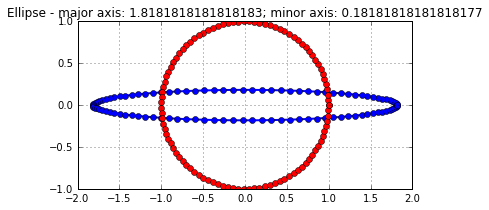

In [5]:
plt.figure()
plt.title('Ellipse - major axis: '+major_str+'; minor axis: '+minor_str)
plt.plot(z_ellipse.real, z_ellipse.imag,
        '-bo',lw=2,ms=6)
plt.plot(z_circle.real,z_circle.imag,
        '-ro',lw=2,ms=6)
plt.axis('scaled')
plt.grid()

In [6]:
# Pressure coeff. around cylinder
Cp_circle = 1-(uc1**2+vc1**2)

# Pressure coeff. around ellipse
Cp_ellipse = 1-(ua**2+va**2)

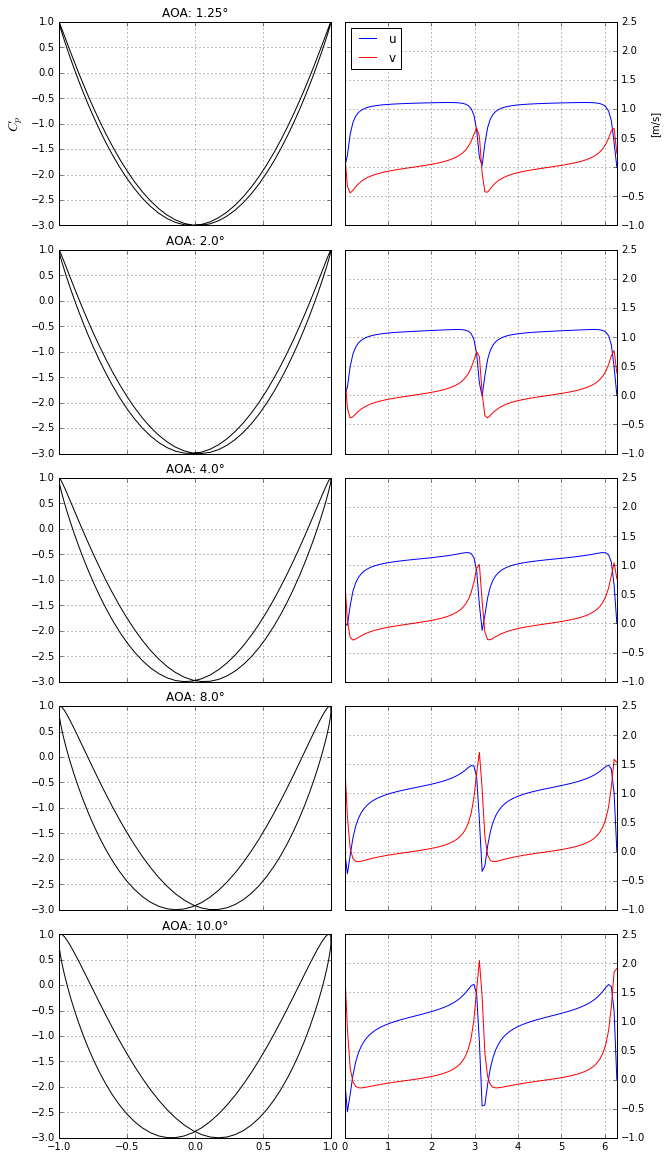

In [7]:
f, ax = plt.subplots(len(alphad),2, sharex='col',sharey='col', figsize=(10,20))
for i in range(len(alphad)):
    ax[i, 0].plot(z_circle.real, Cp_circle[i].T, 'k')
    ax[i, 0].set_title('AOA: '+ str(alphad[i,0,0])+'°')
    ax[i, 0].grid(True)
    ax[i, 1].plot(angle, ua[i].T, 'b')
    ax[i, 1].plot(angle, va[i].T, 'r')
    ax[i, 1].set_xlim([0,2*np.pi])
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_label_position("right")
    ax[i, 1].grid(True)
#plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
f.subplots_adjust(hspace=0.12,wspace=0.05)
#tx = ax[1, 0].text(3,2,'blue: u\nred: v')
ax[0, 1].legend(['u', 'v'],loc=2)
ax[0, 0].set_ylabel('$C_p$',fontsize=14)
ax[0, 1].set_ylabel('[m/s]')
plt.show()

ValueError: x and y must have same first dimension

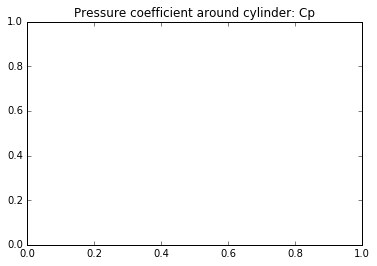

In [8]:
# Plots of solutions
plt.figure()
plt.title('Pressure coefficient around cylinder: Cp')
plt.plot(np.real(z_circle),1-(uc1**2+vc1**2),
        '-ok',lw=2)
plt.grid()

plt.figure()
plt.title('x-velocity around ellipse')
plt.plot(angle,ua)
plt.xlim(0,2*np.pi)
plt.grid()

plt.figure()
plt.title('y-velocity around ellipse')
plt.plot(angle,va)
plt.xlim(0,2*np.pi)
plt.grid()

plt.figure()
plt.title('Pressure coeff. around ellipse, Cp - AOA = '+theta_str)
plt.plot(np.real(z_ellipse), 1-(ua**2+va**2),
        '-ok',lw=2)
plt.grid()

plt.figure()
plt.title('Streamline around circle')
plt.contour(np.real(z),np.imag(z),np.imag(f),list(np.linspace(-5,5,100)))
plt.fill(np.real(z_circle),np.imag(z_circle),'y')
plt.axis('scaled') # shall be before xlim ylim
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.figure()
plt.title('Streamline around ellipse')
plt.contour(np.real(J),np.imag(J),np.imag(f),list(np.linspace(-5,5,100)))
plt.fill(np.real(z_ellipse),np.imag(z_ellipse),'y')
plt.axis('scaled') # shall be before xlim ylim
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.figure()
plt.title('Velocity vectors - circle')
plt.quiver(z.real,z.imag,u1,v1)
plt.fill(z_circle.real, z_circle.imag, '-y')
plt.axis('scaled') # shall be before xlim ylim
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.figure()
plt.title('Velocity vectors - Ellipse')
plt.quiver(J.real,J.imag,u,v)
plt.fill(z_ellipse.real,z_ellipse.imag, '-y')
plt.axis('scaled')
plt.xlim(-3,3)
plt.ylim(-3,3)

ValueError: 'x' can have at maximum 2 dimensions

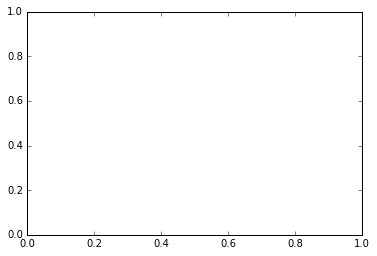

In [9]:
plt.streamplot(J.real, J.imag, u,y)

In [10]:
a = np.array([ 1,2,3])

In [ ]:
a

In [ ]:
a.shape

In [ ]:
b = np.array([[4,5,6]])

In [ ]:
np.shape(alpha[None,None,:]*z[...,None]) # z[...,None] = z[:,:,None]

$
\left[\begin{array}{} x_1 & x_2 \\ x_3 & x_4 \end{array}\right]
\left[\begin{array}{} y_1 & y_2 \\ y_3 & y_4 \end{array}\right]
$

$f = x^n + x$  
$n \in [1,2,3]$  
$x \in R^2$  

In [ ]:
b = np.array([[1,2,3], [3,4,5]])

In [ ]:
b

In [ ]:
np.swapaxes(b,0,1)

In [ ]:
np.array([  [[1],[2]], [[2,3]] ] ).shape

In [ ]:
np.shape

In [ ]:
np.array([[[1,2,3]]]).shape

In [ ]:
c = a[:,None,None]*a[None,:,None]*np.array([[[1,2,3]]])

In [ ]:
c[2,:,:]

In [ ]:
c[2]

In [ ]:
b = a[:,None,None]*a[None,:,None]

In [ ]:
d = np.array([[[1,2,3]]])